In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import collections

from typing import Any, List, Tuple

from recommend.utils import PROJ_ROOT

# Utility functions

In [2]:
def creators2list(creators : str, top_n_actors : int = 3) -> List[str]:
    """Returns a list of `top_n_actors`, director, and a composer."""
    result = []
    
    if 'Hrají' in creators:
        result = creators['Hrají'][:top_n_actors]
        result = list(map(lambda x: x[1], result))

    if 'Režie' in creators:
        result += [creators['Režie'][0][1]]
    if 'Hudba' in creators:
        result += [creators['Hudba'][0][1]]
    return result


def analyse_freq(list_of_lists : List[List[Any]]) -> List[Tuple[Any, int]]:
    """
    Counts occurences of items in a list of lists
    and returns them in descending order as tuples <item, count>."""

    flat_list = [item for sublist in list_of_lists for item in sublist]
    counter = collections.Counter(flat_list)
    return counter.most_common(len(counter))


def get_value(df : pd.DataFrame, movie_id : str, col : str) -> Any:
    """Retrieves a value in a cell specified by `col` for movie with ID `movie_id`"""
    return df.loc[df['movie_id'] == m_id][col].values[0]

def ids2df(ids : List[str], df : pd.DataFrame) -> pd.DataFrame:
    """Converts list of movie_ids to a dataframe while preserving order."""
    df_list = [df[df['movie_id'] == _id] for _id in ids]
    return pd.concat(df_list)

### Czech stemmer

In [3]:
''' Czech stemmer
Copyright © 2010 Luís Gomes <luismsgomes@gmail.com>.

Ported from the Java implementation available at:
    http://members.unine.ch/jacques.savoy/clef/index.html

'''
import re
import sys


def cz_stem(word, aggressive=False):
    if not re.match("^\\w+$", word):
        return word
    if not word.islower() and not word.istitle() and not word.isupper():
        #print("warning: skipping word with mixed case: {}".format(word),
              #file=sys.stderr)
        return word
    s = word.lower() # all our pattern matching is done in lowercase
    s = _remove_case(s)
    s = _remove_possessives(s)
    if aggressive:
        s = _remove_comparative(s)
        s = _remove_diminutive(s)
        s = _remove_augmentative(s)
        s = _remove_derivational(s)
    if word.isupper():
        return s.upper()
    if word.istitle():
        return s.title()
    return s

def _remove_case(word):
    if len(word) > 7 and word.endswith("atech"):
        return word[:-5]
    if len(word) > 6:
        if word.endswith("ětem"):
            return _palatalise(word[:-3])
        if word.endswith("atům"):
            return word[:-4]
    if len(word) > 5:
        if word[-3:] in {"ech", "ich", "ích", "ého", "ěmi", "emi", "ému",
                         "ete", "eti", "iho", "ího", "ími", "imu"}:
            return _palatalise(word[:-2])
        if word[-3:] in {"ách", "ata", "aty", "ých", "ama", "ami",
                         "ové", "ovi", "ými"}:
            return word[:-3]
    if len(word) > 4:
        if word.endswith("em"):
            return _palatalise(word[:-1])
        if word[-2:] in {"es", "ém", "ím"}:
            return _palatalise(word[:-2])
        if word[-2:] in {"ům", "at", "ám", "os", "us", "ým", "mi", "ou"}:
            return word[:-2]
    if len(word) > 3:
        if word[-1] in "eiíě":
            return _palatalise(word)
        if word[-1] in "uyůaoáéý":
            return word[:-1]
    return word

def _remove_possessives(word):
    if len(word) > 5:
        if word[-2:] in {"ov", "ův"}:
            return word[:-2]
        if word.endswith("in"):
            return _palatalise(word[:-1])
    return word

def _remove_comparative(word):
    if len(word) > 5:
        if word[-3:] in {"ejš", "ějš"}:
            return _palatalise(word[:-2])
    return word

def _remove_diminutive(word):
    if len(word) > 7 and word.endswith("oušek"):
        return word[:-5]
    if len(word) > 6:
        if word[-4:] in {"eček", "éček", "iček", "íček", "enek", "ének",
                         "inek", "ínek"}:
            return _palatalise(word[:-3])
        if word[-4:] in {"áček", "aček", "oček", "uček", "anek", "onek",
                         "unek", "ánek"}:
            return _palatalise(word[:-4])
    if len(word) > 5:
        if word[-3:] in {"ečk", "éčk", "ičk", "íčk", "enk", "énk",
                         "ink", "ínk"}:
            return _palatalise(word[:-3])
        if word[-3:] in {"áčk", "ačk", "očk", "učk", "ank", "onk",
                         "unk", "átk", "ánk", "ušk"}:
            return word[:-3]
    if len(word) > 4:
        if word[-2:] in {"ek", "ék", "ík", "ik"}:
            return _palatalise(word[:-1])
        if word[-2:] in {"ák", "ak", "ok", "uk"}:
            return word[:-1]
    if len(word) > 3 and word[-1] == "k":
        return word[:-1]
    return word

def _remove_augmentative(word):
    if len(word) > 6 and word.endswith("ajzn"):
        return word[:-4]
    if len(word) > 5 and word[-3:] in {"izn", "isk"}:
        return _palatalise(word[:-2])
    if len(word) > 4 and word.endswith("ák"):
        return word[:-2]
    return word

def _remove_derivational(word):
    if len(word) > 8 and word.endswith("obinec"):
        return word[:-6]
    if len(word) > 7:
        if word.endswith("ionář"):
            return _palatalise(word[:-4])
        if word[-5:] in {"ovisk", "ovstv", "ovišt", "ovník"}:
            return word[:-5]
    if len(word) > 6:
        if word[-4:] in {"ásek", "loun", "nost", "teln", "ovec", "ovík",
                         "ovtv", "ovin", "štin"}:
            return word[:-4]
        if word[-4:] in {"enic", "inec", "itel"}:
            return _palatalise(word[:-3])
    if len(word) > 5:
        if word.endswith("árn"):
            return word[:-3]
        if word[-3:] in {"ěnk", "ián", "ist", "isk", "išt", "itb", "írn"}:
            return _palatalise(word[:-2])
        if word[-3:] in {"och", "ost", "ovn", "oun", "out", "ouš",
                         "ušk", "kyn", "čan", "kář", "néř", "ník",
                         "ctv", "stv"}:
            return word[:-3]
    if len(word) > 4:
        if word[-2:] in {"áč", "ač", "án", "an", "ář", "as"}:
            return word[:-2]
        if word[-2:] in {"ec", "en", "ěn", "éř", "íř", "ic", "in", "ín",
                         "it", "iv"}:
            return _palatalise(word[:-1])
        if word[-2:] in {"ob", "ot", "ov", "oň", "ul", "yn", "čk", "čn",
                         "dl", "nk", "tv", "tk", "vk"}:
            return word[:-2]
    if len(word) > 3 and word[-1] in "cčklnt":
        return word[:-1]
    return word

def _palatalise(word):
    if word[-2:] in {"ci", "ce", "či", "če"}:
        return word[:-2] + "k"

    if word[-2:] in {"zi", "ze", "ži", "že"}:
        return word[:-2] + "h"

    if word[-3:] in {"čtě", "čti", "čtí"}:
        return word[:-3] + "ck"

    if word[-3:] in {"ště", "šti", "ští"}:
        return word[:-3] + "sk"
    return word[:-1]


# Load datasets

In [4]:
movies = pd.read_pickle(PROJ_ROOT / 'data' / 'movies.pkl')
ratings = pd.read_pickle(PROJ_ROOT / 'data' / 'ratings.pkl')

# Drop irrelevant columns
movies = movies.drop(columns=['kind', 'length', 'poster', 'foreign_titles'])

# Convert creators column to list of creators
movies['creators'] = movies['creators'].apply(creators2list)

display(movies.head(3))
ratings.head(3)

,title,description,genres,countries,year,creators
movie_id,,,,,,
230421-houbicky,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"[Lindsey Haun, Jack Huston, Max Kasch, Paddy B..."
10789-prvni-liga,První liga,V nejvyšší lize získávají hráči baseballu boha...,"[Komedie, Sportovní]",[USA],1989,"[Tom Berenger, Charlie Sheen, Corbin Bernsen, ..."
235032-yes-man,Yes Man,"Carl Allen je zatrpklý bankovní úředník, který...","[Komedie, Romantický]",[USA],2008,"[Jim Carrey, Zooey Deschanel, Bradley Cooper, ..."


,username,movie_id,stars,date,comment
0,kinghome,230421-houbicky,5.0,2011-11-13,Hodnocení některých šašků tady opravdu necháp...
1,SimonShot,230421-houbicky,5.0,2012-12-19,Tento snímek je zajímavý už jenom tím že se n...
2,blackend,230421-houbicky,5.0,2010-09-04,Pohoda a vzhledem k dobré atmosféře a nízkému...


In [5]:
# get mean rating of each film 
avg_ratings = ratings[['movie_id', 'stars']].groupby(['movie_id']).mean()
avg_ratings.rename(columns={'stars': 'avg_stars'}, inplace=True)

# get rating count of each film
count_ratings = ratings[['movie_id', 'stars']].groupby('movie_id').count()
count_ratings.rename(columns={'stars': 'num_ratings'}, inplace=True)
count_ratings

# join with the movies database
movie_db = movies.join(avg_ratings).join(count_ratings).sort_values(by='num_ratings')
movie_db = movie_db.reset_index()
movie_db


# Add Bayesian Average Rating Score column -> 4.6* movie with many reviews > 5.0* movie with few reviews
def compute_bayes_avg(item_rating_avg : float, item_rating_count : int, M, C) -> float:
    """Computes Bayesian average rating for an item"""
    return (item_rating_avg * item_rating_count + C*M) / (item_rating_count + C)

# arithmetic average of all movies
M = np.sum(movie_db.avg_stars * movie_db.num_ratings) / np.sum(movie_db.num_ratings)     
# confidence number (~25% percentile)
C = movie_db.num_ratings.quantile(0.25)

movie_db['bayes_avg_rating'] = compute_bayes_avg(movie_db.avg_stars, movie_db.num_ratings, M, C)
movie_db

,movie_id,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,75613-hercule-poirot_498504-serie-9,Hercule Poirot,Malý belgický detektiv Hercule Poirot (David S...,"[Krimi, Drama, Mysteriózní, Thriller]",[Velká Británie],(1989–2013),"[David Suchet, Hugh Fraser, Philip Jackson, Ed...",5.000000,1,3.501384
1,613789-obeti,Oběti,Na televizní obrazovku se vrací cyklus o lide...,[Drama],[Česko],(1999–2008),"[Zbyněk Fric, Karel Zima, Libor Žídek, Petr Sl...",5.000000,1,3.501384
2,75613-hercule-poirot_498507-serie-12,Hercule Poirot,Malý belgický detektiv Hercule Poirot (David S...,"[Krimi, Drama, Mysteriózní, Thriller]",[Velká Británie],(1989–2013),"[David Suchet, Hugh Fraser, Philip Jackson, Ed...",4.500000,2,3.506088
3,350930-krtek,Krtek,,"[Animovaný, Dobrodružný]","[Česko, Finsko]",2011,"[Zdeněk Miler, Wiliam Bukový]",4.500000,2,3.506088
4,33863-bajaja,Bajaja,Jiří Trnka natočil v roce 1950 volně podle poh...,"[Animovaný, Loutkový, Pohádka]",[Československo],1950,"[Jiří Trnka, Václav Trojan]",4.285714,14,3.581740
...,...,...,...,...,...,...,...,...,...,...
8669,232938-hobit-neocekavana-cesta,Hobit: Neočekávaná cesta,Film sleduje cestu hlavní postavy Bilbo Pytlík...,"[Dobrodružný, Fantasy]","[USA, Nový Zéland]",2012,"[Martin Freeman, Ian McKellen, Richard Armitag...",3.953150,3159,3.938292
8670,227786-interstellar,Interstellar,Příběh se odehrává v nepříliš vzdálené budoucn...,"[Sci-Fi, Dobrodružný, Drama]","[USA, Velká Británie, Kanada]",2014,"[Matthew McConaughey, Anne Hathaway, Jessica C...",4.072779,3174,4.054193
8671,223734-temny-rytir,Temný rytíř,Další Batmanovo dobrodružství začíná. Jeho pro...,"[Akční, Drama, Krimi, Thriller]","[USA, Velká Británie]",2008,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",4.559151,3770,4.530368
8672,254156-pocatek,Počátek,Dom Cobb (Leonardo DiCaprio) je velmi zkušený ...,"[Akční, Sci-Fi, Thriller, Mysteriózní, Dobrodr...","[USA, Velká Británie]",2010,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",4.368000,4000,4.345674



# Recommendation Systems
---
## Base class

In [6]:
import abc

class RecSysBase(abc.ABC):
    """
    Recommendation System Base class.
    
    The system stores a database of available movies.
    """
    def __init__(self, movies_df : pd.DataFrame):
        self.movies_df = movies_df
    
    @property
    def name(self):
        return self.__class__.__name__

    @abc.abstractmethod
    def recommend(self, user_history : List[str], n : int = None) -> pd.DataFrame:
        """
        Generates recommendations based on user's history of rated movies.
        
        Parameters
        ----------
        user_history : List[str]
            A list of movie ids a user has rated so far.
            
        n : int
            The number of recommendations to return.
            Default value None returns all movies from database.
        
        Returns
        -------
        pd.DataFrame
            movie_id ~ movie ID
            score_<class_name> ~ score of each movie
        """
        ...

    def get_candidate_movies(self, user_history : List[str]) -> pd.DataFrame:
        """Returns a list of candidates by filtering movies a user has already seen."""
        df = pd.concat([self.movies_df, self._ids2df(user_history, preserve_order=False)])
        # convert to str because drop_duplicates does not work on dfs containing structures
        return df.loc[df.astype(str).drop_duplicates(keep=False).index]

    def _ids2df(self, movie_ids : List[str], preserve_order : bool = True) -> pd.DataFrame:
        """For a list of movie ids returns a dataframe compatible with `self.movies_df`"""        
        if not preserve_order or len(movie_ids) == 0:
            # faster variant but sorted as in self.movies_df 
            mask = self.movies_df['movie_id'].isin(movie_ids)
            return self.movies_df.loc[mask]

        df_list = []
        for mid in movie_ids:
            df_list.append(self.movies_df[self.movies_df['movie_id'] == mid])
        return pd.concat(df_list)


## Random recommendations

In [8]:
import random

class RandomRS(RecSysBase):
    """
    System that recommends movies randomly.
    """
    def __init__(self, movies_df : pd.DataFrame):
        super(RandomRS, self).__init__(movies_df)

    def recommend(self, user_history : List[str], n : int = None) -> pd.DataFrame:
        """
        Recommends n random movies.
        Movies from `user_history` do not appear in the recommendations.
        """
        candidates = self.get_candidate_movies(user_history)
        recommendations = candidates.sample(n, random_state=42) if type(n) is int else candidates.sample(frac=1, random_state=42)
        recommendations = recommendations[['movie_id']]
        recommendations[f'score_{self.name}'] = 0
        return recommendations
    


In [9]:
rnd_rs = RandomRS(movie_db)

rnd_rs.recommend([])

,movie_id,score_RandomRS
7047,193136-vyvrzenci-pekla,0
4210,1712-bubba-ho-tep,0
6662,7742-fakulta,0
3834,4364-zbesilost,0
8607,222972-star-trek,0
...,...,...
5734,67290-sedmilharky,0
5191,309380-wolf-creek-2,0
5390,94113-farma-zvirat,0
860,342884-danieluv-svet,0


## Recommendation based on movie popularity

In [10]:

class TopNRS(RecSysBase):
    """
    System recommends top n most popular movies a user has not rated yet.
    """
    # NOTE: abstract because subclasses need to define self.by_column
    @abc.abstractmethod
    def __init__(self, movies_df : pd.DataFrame):
        super(TopNRS, self).__init__(movies_df)
        

    def recommend(self, user_history : List[str], n : int = None) -> pd.DataFrame:
        """
        Recommends top n movies (a user has not yet seen) which are sorted by a selected column.
        """
        recommendations = self.get_candidate_movies(user_history)\
                                .sort_values(by=self.sort_by_column, ascending=False)\
                                .head(n)
        results = recommendations[['movie_id']].copy()
        results[f'score_{self.name}_{self.sort_by_column}'] = recommendations[self.sort_by_column]
        return results

    
class MostRatingsRS(TopNRS):
    """Recommends movies with the most ratings (a user has yet not rated)."""
    def __init__(self, movies_df : pd.DataFrame):
        super(MostRatingsRS, self).__init__(movies_df)
        self.sort_by_column = 'num_ratings'
    
class TopBayesAvgRatingRS(TopNRS):
    """Recommends movies with the best Bayes average rating (a user has yet not rated)."""
    def __init__(self, movies_df : pd.DataFrame):
        super(TopBayesAvgRatingRS, self).__init__(movies_df)
        self.sort_by_column = 'bayes_avg_rating'


In [11]:
history = ['228329-avatar']

rs_num_ratings = MostRatingsRS(movie_db)
rs_num_ratings.recommend(history)

,movie_id,score_MostRatingsRS_num_ratings
8672,254156-pocatek,4000
8671,223734-temny-rytir,3770
8670,227786-interstellar,3174
8669,232938-hobit-neocekavana-cesta,3159
8668,294824-nespoutany-django,3129
...,...,...
4,33863-bajaja,14
2,75613-hercule-poirot_498507-serie-12,2
3,350930-krtek,2
1,613789-obeti,1


In [12]:
rs_bayes_avg = TopBayesAvgRatingRS(movie_db)
rs_bayes_avg.recommend([])

,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating
8667,2294-vykoupeni-z-veznice-shawshank,4.724851
8466,821-s-certy-nejsou-zerty,4.710589
8595,1248-terminator-2-den-zuctovani,4.706829
8663,10135-forrest-gump,4.690586
8546,6178-dvanact-rozhnevanych-muzu,4.689629
...,...,...
7059,8597-jak-ukrast-dagmaru,0.949324
7746,289279-tisic-a-jedna-noc,0.895201
6759,226809-velmi-krehke-vztahy,0.857553
8339,215294-ordinace-v-ruzove-zahrade,0.829809


# Gensim models: TFIDF

In [13]:

class GensimModelWrapper(RecSysBase):
    """
    Base class for gensim based models.
    Implements methods for document preprocessing.
    """
    def __init__(self, movies_df : pd.DataFrame):
        super(GensimModelWrapper, self).__init__(movies_df)
    
    @abc.abstractmethod
    def recommend(self, user_history : List[str], n : int = None) -> pd.DataFrame:
        ...
    
    @classmethod
    def _document_to_tokens(cls, document: str) -> List[str]:
        """
        Filters stop words and applies stemming on the given string.

        Parameters
        ----------
        text : str
            A simple string containing text to preprocess.
        """
        tokens = word_tokenize(document.lower(), language='czech')
        tokens = [w.strip(",.:'?!()[]{}<>_-") for w in tokens]
        tokens = [w for w in tokens if w not in set(stop_words.get_stop_words('czech'))]
        tokens = [cz_stem(word) for word in tokens]
        tokens = [w for w in tokens if len(w) > 2]
        return tokens
    
    @classmethod
    def _document_to_bag_of_words(cls, document: str) -> List[Tuple[int, int]]:
        return cls.DICTIONARY.doc2bow(cls._document_to_tokens(document))
    
    @classmethod
    def _tokens_to_bag_of_words(cls, tokens: List[str]) -> List[Tuple[int, int]]:
        return cls.DICTIONARY.doc2bow(tokens)
    

## TF-IDF Base Model

In [14]:
import stop_words
from nltk.tokenize import word_tokenize
from multiprocessing import get_context
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import SparseMatrixSimilarity
from tqdm import tqdm


class TfidfBaseRS(GensimModelWrapper):
    """
    TODO: finish & describewhat to do with subclasses: System recommends unseen movies using TF-IDF 
    """
    def __init__(self, movies_df : pd.DataFrame):
        super(TfidfBaseRS, self).__init__(movies_df)
        
        # TfidfRS subclasses need to implement what a document is
        documents = self.extract_documents(movies_df)
        
        # TODO: can we move the following functionality to GensimModelWrapper??
        # Build Dictionary
        with get_context('fork').Pool(None) as pool:
            doc_tokens = pool.imap(self.__class__._document_to_tokens, documents)
            doc_tokens = tqdm(doc_tokens, desc='Building the dictionary', total=len(documents))
            self.dictionary = Dictionary(doc_tokens)
            self.__class__.DICTIONARY = self.dictionary
        
        # Build TF-IDF model
        with get_context('fork').Pool(None) as pool:
            doc_bows = pool.imap(self.__class__._document_to_bag_of_words, documents)
            doc_bows = tqdm(doc_bows, desc='Building the TF-IDF model', total=len(documents))
            self.tfidf_model = TfidfModel(doc_bows)
            self.__class__.TFIDF_MODEL = self.tfidf_model

        # Build the index
        with get_context('fork').Pool(None) as pool:    
            doc_vectors = pool.imap(self.__class__._document_to_tfidf_vector, documents)
            doc_vectors = tqdm(doc_vectors, desc=f'Building the TF-IDF index', total=len(documents))
            self.index = SparseMatrixSimilarity(doc_vectors, num_docs=len(documents), num_terms=len(self.dictionary))
            
        del self.__class__.DICTIONARY
        del self.__class__.TFIDF_MODEL 

        self.index_to_movie_id = dict(enumerate(self.movies_df.movie_id.to_list()))

    @abc.abstractstaticmethod
    def extract_documents(movies_df : pd.DataFrame) -> List[str]:
        """Method extracts list of documents from movie_db"""
        ...
    
    def get_document_for_movie_id(self, movie_id : str) -> str:
        """Returns a document for movie with provided ID"""
        return self.extract_documents(self.movies_df.loc[self.movies_df['movie_id'] == movie_id])[0]
    
    
    def recommend(self, user_history : List[str], n : int = None) -> pd.DataFrame:
        """Recommends unseen movies using tfidf vectors and cosine similarity.
        
        Parameters
        ----------
        user_history : List[str]
            A list of movie IDs
        
        n : int
            Recommends n movies, if set to an integer.
            Default value None returns all the movies.
        """
        # Take last k movies, join them into a single description and create a query.
        k = 50 # TODO: should this be a configurable parameter? should it be tuned?
        last_k_movies = user_history[-k:]
        query = ' '.join([self.get_document_for_movie_id(mid) for mid in last_k_movies])
        
        self.__class__.DICTIONARY = self.dictionary
        self.__class__.TFIDF_MODEL = self.tfidf_model

        query_vector = self.__class__._document_to_tfidf_vector(query)
        similarities = enumerate(self.index[query_vector])
        similarities = sorted(similarities, key=lambda item: item[1], reverse=True)

        result_ids, scores = [], []
        for idx, sim in similarities:
            movie_id = self.index_to_movie_id[idx]
            if movie_id not in user_history:
                result_ids.append(movie_id)
                scores.append(sim)
            
            if len(result_ids) == n:
                break
        
        del self.__class__.DICTIONARY
        del self.__class__.TFIDF_MODEL
        
        return pd.DataFrame({
            'movie_id': result_ids,
            f'score_{self.name}': scores
        })

    @classmethod
    def _document_to_tfidf_vector(cls, document: str) -> List[Tuple[int, float]]:
        return cls.TFIDF_MODEL[cls._document_to_bag_of_words(document)]
    
    @classmethod
    def _bow_to_tfidf_vector(cls, bow: List[Tuple[int, int]]) -> List[Tuple[int, float]]:
        return cls.TFIDF_MODEL[bow]

    

## TF-IDF recommender systems

In [15]:
class TfidfTitleRS(TfidfBaseRS):
    """Applies tf-idf scoring on movie title."""
    def __init__(self, movies_df : pd.DataFrame):
        super(TfidfTitleRS, self).__init__(movies_df)

    @staticmethod
    def extract_documents(movies_df : pd.DataFrame) -> List[str]:
        """Method extracts list of documents from movie_db"""
        return list(movies_df.title.astype(str))

    
class TfidfDescriptionTitleRS(TfidfBaseRS):
    """Applies tf-idf scoring on concatenated movie title and description."""
    def __init__(self, movies_df : pd.DataFrame):
        super(TfidfDescriptionTitleRS, self).__init__(movies_df)

    @staticmethod
    def extract_documents(movies_df : pd.DataFrame) -> List[str]:
        """Method extracts list of documents from movie_db"""
        return list(movies_df.title.astype(str) + ' ' + movies_df.description)


In [16]:
rs_tfidf_descr_title = TfidfDescriptionTitleRS(movie_db)

Building the TF-IDF index: 100%|██████████| 8674/8674 [00:10<00:00, 821.21it/s]


In [17]:
history = ['1644-kmotr', '1645-kmotr-ii', '9499-matrix', '342231-lego-batman']
rs_tfidf_descr_title.recommend(history, n=15)

,movie_id,score_TfidfDescriptionTitleRS
0,1646-kmotr-iii,0.312191
1,1643-kmotr-1-2-3,0.273426
2,392898-lego-r-batman-film,0.167242
3,6-maffiosso,0.153228
4,9498-matrix-revolutions,0.152167
5,266796-liga-spravedlivych-krize-na-dvou-zemich,0.141337
6,223734-temny-rytir,0.134347
7,1069-batman,0.131433
8,319515-batman-navrat-temneho-rytire-cast-2,0.123253
9,60899-batman-vs-joker,0.121176


### TFIDF on titles only


In [18]:
rs_tfidf_titles = TfidfTitleRS(movie_db)

Building the TF-IDF index: 100%|██████████| 8674/8674 [00:00<00:00, 10086.92it/s]


In [19]:
history = ['1644-kmotr', '1645-kmotr-ii', '9499-matrix', '342231-lego-batman']
rs_tfidf_titles.recommend(history, 15)

,movie_id,score_TfidfTitleRS
0,1643-kmotr-1-2-3,0.722059
1,308348-pribeh-kmotra,0.590029
2,1646-kmotr-iii,0.553994
3,93895-batman,0.299027
4,1069-batman,0.299027
5,9498-matrix-revolutions,0.254653
6,9497-matrix-reloaded,0.254653
7,366712-the-den,0.218506
8,288161-batman-rok-jedna,0.210468
9,351124-batmanuv-syn,0.204622


# Genres

In [20]:
from scipy import sparse
from sklearn.preprocessing import MultiLabelBinarizer


class GenresRS(RecSysBase):
    """
    Recommends most similar movies based on cosine similarity
    on multi-hot encoded genres.
    """
    def __init__(self, movies_df : pd.DataFrame):
        super(GenresRS, self).__init__(movies_df)
        
        self.mlb = MultiLabelBinarizer(sparse_output=True)

        df_genres_onehot = pd.DataFrame.sparse.from_spmatrix(
                self.mlb.fit_transform(movies_df.copy()[['genres']].pop('genres')),
                index=movies_df.index,
                columns=self.mlb.classes_)

        np_genres_onehot = sparse.csr_array(df_genres_onehot)
        self.index = SparseMatrixSimilarity(np_genres_onehot,
                                            num_docs=df_genres_onehot.shape[0],
                                            num_terms=df_genres_onehot.shape[1])
        
        self.index_to_movie_id = dict(enumerate(self.movies_df.movie_id.to_list()))
        self.genre_to_idx = { gen: i for i, gen in enumerate(df_genres_onehot.columns) }
        
        
    def recommend(self, user_history : List[str], n : int = None) -> pd.DataFrame:
        query = np.zeros(38)
        for mid in user_history:
            for gn in self.movies_df[self.movies_df.movie_id == mid].genres.tolist()[0]:
                i = self.genre_to_idx[gn]
                query[i] += 1
        
        similarities = enumerate(self.index[query])
        similarities = sorted(similarities, key=lambda item: item[1], reverse=True)

        result_ids, scores = [], []
        for idx, sim in similarities:
            movie_id = self.index_to_movie_id[idx]
            if movie_id not in user_history:
                result_ids.append(movie_id)
                scores.append(sim)
        
            if len(result_ids) == n:
                break
        
        return pd.DataFrame({
            'movie_id': result_ids,
            f'score_{self.name}': scores
        })

# Embedding approaches

In [35]:
from transformers import AutoTokenizer, AutoModelForPreTraining, AutoModelForCausalLM
import torch
import ast

class EmbedResSys(RecSysBase):
    """
    System recommends unseen movies using embeddings
    
    csv_embed_path ... string path to a dataframe mapping movie_id to embedding
    """
    def __init__(self, movies_df : pd.DataFrame, csv_embed_path : str = None):        
        self.movies_df = movies_df
        if csv_embed_path is None:
            self.device = "cuda"
            self.prepare_model_tokenizer()           
            self.embeds_df = self.generate_embeddings()
        else:
            self.embeds_df = pd.read_csv(csv_embed_path)
            self.embeds_df.embedding = self.embeds_df.embedding.apply(ast.literal_eval)
            
        # pick those rows of the embeds_df that correspond to the movies_df
        
        self.embeds_df = pd.merge(self.movies_df, self.embeds_df, how='inner')[["movie_id", "embedding"]]
    
        # target matrix of all embeddings for getting the similarity 
        self.target = torch.tensor(list(self.embeds_df.embedding))
        
        self.index_to_movie_id = dict(enumerate(movies_df.movie_id.to_list()))
    
    
    def recommend(self, user_history : List[str], n : int = None, return_df : bool = False) -> List[str]:
        """Recommends unseen movies using embeddings from headlines.

        Parameters
        ----------
        user_history : List[str]
            A list of movie IDs

        n : int
            Recommends n movies, if set to an integer.
            Default value None returns all the movies.
        """
        if not n:
            n = len(self.movies_df)
        
        # Take last k movies, join them into a single description and create a query.
        k = 50 # TODO: should this be a customizable parameter? or should it be tuned?
        last_k_movies = user_history[-k:]
        # mean of the embeddings of th last k movies
        query = torch.mean(torch.tensor([self.embeds_df.loc[self.embeds_df.movie_id == m]["embedding"].iloc[0] for m in user_history]), dim=0)
        
        similarities = list(enumerate(self.get_similarities(query)))
        similarities = sorted(similarities, key=lambda item: item[1].item(), reverse=True)

        result_ids, scores = [], []
        for idx, sim in similarities:
            movie_id = self.index_to_movie_id[idx]
            if movie_id not in user_history:
                result_ids.append(movie_id)
                scores.append(sim.item())
            
            if len(result_ids) == n:
                break

        return pd.DataFrame({
            'movie_id': result_ids,
            f'score_{self.name}': scores
        })
    
    
    def generate_embeddings(self, save_dir=f"../../../data"):
        embeds_df = self.generate_descriptors()
        
        embeds = []
        for h in tqdm(embeds_df.descriptor):
            embeds.append(self.generate_one_embedding(h))
        embeds_df["embedding"] = embeds
        
        if save_dir:
            embeds_df.to_csv(save_dir+f"/{self.name}_embeddings.csv")
        
        return embeds_df
    
    
    def generate_one_embedding(self, sentence):
        # convert one descriptor to BERT input and generate embeddings
        marked_text = "[CLS] " + str(sentence) + " [SEP]"

        # Tokenize our sentence with the BERT tokenizer.
        tokenized_text = self.tokenizer.tokenize(marked_text)

        # Map the token strings to their vocabulary indeces.
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

        # Mark each of the 22 tokens as belonging to sentence "1".
        segments_ids = [1] * len(tokenized_text)

        # Convert to pytorh and cut the tensor to max len: 512 
        tokens_tensor = torch.tensor([indexed_tokens])[:, :512].to(self.device)
        segments_tensors = torch.tensor([segments_ids])[:, :512].to(self.device)

        # Run the text through BERT, and collect all of the hidden states produced
        # from all 12 layers. 
        with torch.no_grad():
            outputs = self.model(tokens_tensor, segments_tensors, output_hidden_states=True)
            hidden_states = outputs[2]

        # Concatenate the tensors for all layers. We use `stack` here to
        # create a new dimension in the tensor.
        token_embeddings = torch.stack(hidden_states, dim=0)

        # Remove dimension 1, the "batches".
        token_embeddings = torch.squeeze(token_embeddings, dim=1)

        # Swap dimensions 0 and 1.
        token_embeddings = token_embeddings.permute(1,0,2)

        # `token_vecs` is a tensor with shape [22 x 768]
        token_vecs = hidden_states[-2][0]

        # Calculate the average of all 22 token vectors.
        sentence_embedding = torch.mean(token_vecs, dim=0)

        return sentence_embedding.tolist()

    
    def get_similarities(self, query):
        return torch.nn.CosineSimilarity(dim=-1)(query, self.target)
    
    
    def prepare_model_tokenizer(self):
        self.model = AutoModelForPreTraining.from_pretrained("UWB-AIR/Czert-B-base-cased")
        self.tokenizer = AutoTokenizer.from_pretrained("UWB-AIR/Czert-B-base-cased")
        device = 'cuda' # 'cpu' alternatively
        self.model.to(self.device)
        self.model.eval()
    
    # conerts string representation of list to a torch tensor
    def string_to_torch(self, string):
        return torch.tensor([float(x) for x in string[1:-1].split(",")])

    
    def batch(self, iterable, n=1):
        l = len(iterable)
        for ndx in range(0, l, n):
            yield iterable[ndx:min(ndx + n, l)]
    
    @abc.abstractmethod
    def generate_descriptors(self):
        pass

## Headline embedding
generate headlines and put it to the root_dir/data/headlines.csv file

In [36]:
from tqdm import tqdm
import sys
sys.path.append('../') # TODO: Adam???
from utils import add_special_tokens, generate_one_summary_fast
from transformers import AutoTokenizer, AutoModelForPreTraining
import torch

class HeadlineEmbedResSys(EmbedResSys):
    """
    System recommends unseen movies using embeddings
    
    csv_embed_path ... string path to a dataframe mapping movie_id to embedding
    """
    def __init__(self, movies_df : pd.DataFrame, csv_embed_path : str = "../../../data/HeadlineEmbedResSys_embeddings.csv"):  
     
        super(HeadlineEmbedResSys, self).__init__(movies_df, csv_embed_path=csv_embed_path)        

        
    def generate_descriptors(self):
        # load model
        model = AutoModelForCausalLM.from_pretrained("MU-NLPC/CzeGPT-2")

        # put model into eval mode and on device
        model.eval()
        device = 'cuda' # 'cpu' alternatively
        model.to(device)

        # load and set tokenizer
        tokenizer = AutoTokenizer.from_pretrained("MU-NLPC/CzeGPT-2")
        special_tokens = {'sep_token':'<|sep|>'}
        tokenizer.add_special_tokens(special_tokens)
        tokenizer.model_max_length = 1024
        
        # for each description get a descriptor
        descriptors = []
        for i in tqdm(range(len(self.movies_df["description"]))):
            input_seq = self.movies_df.iloc[i]["description"]
            descriptors.append(generate_one_summary_fast(input_seq, tokenizer, model, top_k=50, top_p=0.5, device=device, eos_stopping=True))

        hdf = self.movies_df.head(len(descriptors))[["movie_id"]]
        hdf["descriptor"] = descriptors
        return hdf

In [37]:
from nltk.tokenize import sent_tokenize

class FirstSentEmbedResSys(EmbedResSys):
    """
    System recommends unseen movies using embeddings
    
    csv_embed_path ... string path to a dataframe mapping movie_id to embedding
    """
    def __init__(self, movies_df : pd.DataFrame, csv_embed_path : str = "../../../data/FirstSentEmbedResSys_embeddings.csv"):  
     
        super(FirstSentEmbedResSys, self).__init__(movies_df, csv_embed_path=csv_embed_path)        

        
    def generate_descriptors(self):        
        # for each description get a descriptor
        first_sent = self.movies_df.description.apply(lambda x: " ".join(sent_tokenize(x)[:1]))
        descriptors = list(self.movies_df.title.astype(str) + ' ' + first_sent)

        hdf = self.movies_df[["movie_id"]]
        hdf["descriptor"] = descriptors
        return hdf

In [38]:
class DescriptionEmbedResSys(EmbedResSys):
    """
    System recommends unseen movies using embeddings
    
    csv_embed_path ... string path to a dataframe mapping movie_id to embedding
    """
    def __init__(self, movies_df : pd.DataFrame, csv_embed_path : str = "../../../data/DescriptionEmbedResSys_embeddings.csv"):  
     
        super(DescriptionEmbedResSys, self).__init__(movies_df, csv_embed_path=csv_embed_path)        

        
    def generate_descriptors(self):        
        # for each description get a descriptor
        descriptors = list(self.movies_df.title.astype(str) + ' ' + self.movies_df.description)

        hdf = self.movies_df[["movie_id"]]
        hdf["descriptor"] = descriptors
        return hdf

In [39]:
class TitleEmbedResSys(EmbedResSys):
    """
    System recommends unseen movies using embeddings
    
    csv_embed_path ... string path to a dataframe mapping movie_id to embedding
    """
    def __init__(self, movies_df : pd.DataFrame, csv_embed_path : str = "../../../data/TitleEmbedResSys_embeddings.csv"):  
     
        super(TitleEmbedResSys, self).__init__(movies_df, csv_embed_path=csv_embed_path)        

        
    def generate_descriptors(self):        
        # for each description get a descriptor
        descriptors = list(self.movies_df.title.astype(str))

        hdf = self.movies_df[["movie_id"]]
        hdf["descriptor"] = descriptors
        return hdf

---
# Ensembles

In [21]:
from sklearn.preprocessing import MinMaxScaler
from __future__ import annotations

class Ensemble:
    """
    Class representing an ensemble of algorithms that individually give scores to movies.
    The final recommendation is made by combining the scores and taking the top n movies.
    
    Parameters
    ----------
    movies_df : pd.DataFrame
        Movie database that is provided to each RecSys based class.

    rs_classes : List[RecSysBase]
        List containing subclasses of RecSysBase to use in the ensemble.

    rs_weights : List[float]
        A list of floats that is used to weight the importance of used algorithms.
        The list should sum to 1 and the order needs to match the order in `rs_classes`.
        By default all the columns have the same weight.
    """
    def __init__(
        self,
        movies_df : pd.DataFrame,
        rs_classes: List[type[RecSysBase]],
        rs_weights: List[float] = None
    ):
        self.movies_df = movies_df
        self.recsystems = []
        self.rs_weights = []

        weights = rs_weights if self._valid_weights(rs_weights, len(rs_classes)) else np.ones(len(rs_classes))

        for rs_cls, w in zip(rs_classes, weights):
            self.append_rs(rs_cls, w)
    
    @staticmethod
    def _valid_weights(weights : List[float], exp_length : int) -> bool:
        """Checks if the weights are not None, all are float and have the expected length"""
        return weights is not None and len(weights) == exp_length and all(
            [isinstance(w, float) or isinstance(w, int)for w in weights]
        )
    
    def append_rs(self, rs_class : type[RecSysBase], rs_weight : float = 1) -> Ensemble:
        """Appends a recommender system model to the ensemble."""
        
        print(f'Ensemble: Initializing {rs_class.__name__} ...')
        self.recsystems.append(rs_class(self.movies_df))
        self.rs_weights.append(rs_weight)
        print(f'Ensemble: {rs_class.__name__} done.')
        return self

    def apply_algs(self, movie_ids : List[str], df_merge_how : str = 'inner') -> pd.DataFrame:
        """Returns scores given to movies by each recommendation algorithm.
        
        Parameters
        ----------
        movie_ids : List[str]
            List of movie_ids
        
        df_merge_how : str
            Argument for pd.DataFrame.merge method on how to perform the merge.
            Default is "inner".

        Returns
        -------
        pd.DataFrame
            For each `movie_id` there are columns with scores named `score_<name of a RS>`.
        """
        dataframes = [rs.recommend(movie_ids) for rs in self.recsystems]
        
        result_df = dataframes[0]
        
        for df in dataframes[1:]:
            # TODO: watch out for `how` when joining dfs without all movies present
            result_df = result_df.merge(df, how=df_merge_how, on='movie_id')
        return result_df

    def combine_scores(
        self,
        scores_table: pd.DataFrame,
        normalize : bool = True,
        rs_weights : List[float] = None,
        ) -> pd.DataFrame:
        """
        Combines recommendation scores of the available algorithms.
        
        Parameters
        ----------
        scores_table : pd.DataFrame
            A DataFrame containing at least `movie_id` and scores of the algs as `score_<name of the alg>`
        
        normalize : bool
            Wether to peform min max scaling of each column with score.
            Default is true.
            TODO: alternatively ignore scores and work simply with ranks?
        
        Returns
        -------
        pd.DataFrame
            The final score for each movie is stored in column `final_score`
        """
        
        score_cols = [c for c in scores_table.columns if c.startswith('score_')]
        
        if normalize:
            scaler = MinMaxScaler()
            scores_table[score_cols] = scaler.fit_transform(scores_table[score_cols])
        
        weights = rs_weights if self._valid_weights(rs_weights, len(self.recsystems)) else self.rs_weights

        if any(w != 1 for w in weights):
            # NOTE: make sure that the order matches?
            if not self.quiet:
                print(f'Weighting the recommendations: {weights}')
            scores_table[score_cols] = scores_table[score_cols] * weights
        else:
            if not self.quiet:
                print(f'Weights have no effect')
        scores_table['final_score'] = scores_table[score_cols].sum(axis=1)
        return scores_table

    
    def recommend(self,
                  movie_ids: List[str],
                  n : int = None,
                  rs_weights : List[float] = None,
                  return_full_info=False,
                  quiet = False) -> List[str]:
        """Produces a list of recommendations by combining results of its ensemble.
        
        Parameters
        ----------
        movie_ids : List[str]
            List of movie ids representing the user history.

        n : int
            Number of movies to recommend.
            Default value is None - all available movies are returned in desceding order by score.  
        
        rs_weights : List[float]
            A list of floats that is used to weight the importance of used algorithms.
            The list should sum to 1 and the order needs to match the order in `self.rs_classes`.
            By default all the columns have the same weight.
            Overrides self.rs_weights.
        """
        self.quiet = quiet # do not print messages for every predictions -> for mass automatical evaluation
        
        scores = self.apply_algs(movie_ids)
        recommendations = self.combine_scores(scores,
                                              normalize=True,
                                              rs_weights=rs_weights).sort_values(by='final_score', ascending=False)
        recommendations = recommendations if n is None else recommendations[:n]
        return recommendations if not return_full_info else recommendations.merge(self.movies_df, how='inner', on='movie_id')
        

    
    def userId_to_history(self, user_id : str) -> List[str]:
        # TODO: helper func. for testing purpose
        ...


In [22]:
WEIGHTS = [0.15, 0.1, 0.15, 0.9, 0.5]
ensemble = Ensemble(movie_db, [TopBayesAvgRatingRS, MostRatingsRS, TfidfTitleRS, TfidfDescriptionTitleRS, GenresRS])

Ensemble: Initializing TopBayesAvgRatingRS ...
Ensemble: TopBayesAvgRatingRS done.
Ensemble: Initializing MostRatingsRS ...
Ensemble: MostRatingsRS done.
Ensemble: Initializing TfidfTitleRS ...


Building the TF-IDF index: 100%|██████████| 8674/8674 [00:01<00:00, 8268.20it/s]


Ensemble: TfidfTitleRS done.
Ensemble: Initializing TfidfDescriptionTitleRS ...


Building the TF-IDF index: 100%|██████████| 8674/8674 [00:13<00:00, 637.73it/s]


Ensemble: TfidfDescriptionTitleRS done.
Ensemble: Initializing GenresRS ...
Ensemble: GenresRS done.


In [24]:
display(history)
ensemble.recommend(history, n=15)

['1644-kmotr', '1645-kmotr-ii', '9499-matrix', '342231-lego-batman']

Weights have no effect


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score
271,1646-kmotr-iii,0.870542,0.143663,0.767242,1.000000,0.500,3.281447
240,1643-kmotr-1-2-3,0.876873,0.026519,1.000000,0.875830,0.500,3.279222
23,223734-temny-rytir,0.951909,0.787012,0.000000,0.430337,0.625,2.794258
303,252669-temny-rytir-povstal,0.865476,0.628941,0.000000,0.263657,0.625,2.383074
3275,308348-pribeh-kmotra,0.712402,0.137398,0.817149,0.115541,0.500,2.282490
706,228329-avatar,0.820036,1.000000,0.000000,0.060627,0.375,2.255663
442,1069-batman,0.844674,0.171643,0.414131,0.421004,0.375,2.226452
0,2294-vykoupeni-z-veznice-shawshank,1.000000,0.651493,0.000000,0.067825,0.500,2.219318
118,254156-pocatek,0.906238,0.835039,0.000000,0.072225,0.375,2.188502
36,8852-pulp-fiction-historky-z-podsveti,0.943132,0.583420,0.000000,0.081550,0.500,2.108103


In [25]:
ensemble.recommend(history, n=15, rs_weights=WEIGHTS, return_full_info=True)

Weighting the recommendations: [0.15, 0.1, 0.15, 0.9, 0.5]


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,1646-kmotr-iii,0.130581,0.014366,0.115086,0.900000,0.2500,1.410034,Kmotr III,Člověk financí a politiky. Al Pacino v hlavní ...,"[Drama, Krimi]",[USA],1990,"[Al Pacino, Diane Keaton, Talia Shire, Francis...",4.309144,689,4.201318
1,1643-kmotr-1-2-3,0.131531,0.002652,0.150000,0.788247,0.2500,1.322430,"Kmotr 1, 2, 3",Původní trilogie KMOTR je zde sestříhána v chr...,"[Krimi, Drama, Thriller]",[USA],1992,"[Marlon Brando, Al Pacino, Robert Duvall, Fran...",4.828125,128,4.226920
2,223734-temny-rytir,0.142786,0.078701,0.000000,0.387304,0.3125,0.921291,Temný rytíř,Další Batmanovo dobrodružství začíná. Jeho pro...,"[Akční, Drama, Krimi, Thriller]","[USA, Velká Británie]",2008,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",4.559151,3770,4.530368
3,60899-batman-vs-joker,0.099124,0.001984,0.036875,0.349333,0.3750,0.862316,Batman vs. Joker,"Barbara se pokouší zabránit loupeži, což se jí...","[Animovaný, Akční, Krimi, Drama, Thriller]",[USA],2016,"[Mark Hamill, Kevin Conroy, Ray Wise, Sam Liu,...",3.208333,96,3.353227
4,392898-lego-r-batman-film,0.105537,0.006724,0.033700,0.482135,0.1875,0.815595,LEGO® Batman film,Batman pokračuje v neúnavné obraně Gotham City...,"[Animovaný, Akční, Dobrodružný, Komedie, Rodin...","[USA, Dánsko]",2017,"[Will Arnett, Jenny Slate, Ralph Fiennes, Chri...",3.538700,323,3.526102
5,6-maffiosso,0.100349,0.004114,0.000000,0.441733,0.2500,0.796196,Maffiósso,Mistr filmové parodie Jim Abrahams si vzal ten...,"[Komedie, Drama, Krimi]",[USA],1998,"[Jay Mohr, Billy Burke, Christina Applegate, J...",3.333333,198,3.386243
6,1069-batman,0.126701,0.017164,0.062120,0.378903,0.1875,0.772388,Batman,"V Gothamu bojuje proti zločinu nejen policie, ...","[Akční, Krimi, Thriller]","[USA, Velká Británie]",1989,"[Michael Keaton, Jack Nicholson, Kim Basinger,...",4.173755,823,4.096705
7,274187-batman-vs-red-hood,0.120075,0.003759,0.032223,0.337825,0.2500,0.743881,Batman vs. Red Hood,Tento akcí nabitý animovaný Batman staví proti...,"[Animovaný, Akční, Krimi, Thriller]",[USA],2010,"[Bruce Greenwood, Jason Isaacs, Neil Patrick H...",4.165746,181,3.918054
8,252669-temny-rytir-povstal,0.129821,0.062894,0.000000,0.237291,0.3125,0.742507,Temný rytíř povstal,Zdánlivě bezstarostný život města je vykoupen ...,"[Akční, Krimi, Drama, Thriller]","[USA, Velká Británie]",2012,"[Christian Bale, Gary Oldman, Tom Hardy, Chris...",4.204779,3013,4.180829
9,9498-matrix-revolutions,0.102393,0.018229,0.052901,0.438675,0.1250,0.737199,Matrix Revolutions,Ve výbušné závěrečné kapitole trilogie Matrix ...,"[Akční, Sci-Fi]","[USA, Austrálie]",2003,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...",3.435927,874,3.441355


## Manual (and also automatic) evaluation
5 different characters, 3 people for each character, 5 movies for each person as input, the first 10 predictions are manually evaluated (whether it fits or not)

Characters
    
    1) child - (fairytales, animated movies, family movies)
        a) Doba ledová II, Shrek I, Sám doma, Tři oříšky pro popelku, Asterix v Británii
        b) Coco, Hvězdný prach, Na vlásku, Harry Potter a Vezeň z Azkabanu, Nekonečný příběh
        c) Úžasňákovi, Páni kluci, S čerty nejsou žerty, Princezna Mononoke, Cesta do fantazie                  (trošku japonsky laděné)
    
    2) late teenager boy (superheroes, action movies, sci-fi, horrors)
        a) Gentlemani, Avengers: End Game, Ready Player One: Hra začíná, V zajetí démonů 2, Mission: Impossible - Fallout
        b) Strážci Galaxie vol.2, Rogue One: Star Wars Story, John Wick, Rozpolcený, X-men: Dark Phoenix
        c) Doctor Strange, Uteč, Počátek, Deadpool 2, To

    3) teenager girl (high school comedies, musicals, disney musicals, romantic action)
        a) Lví král, La La Land, Kráska a zvíře, Ledové království II, Divergence
        b) Aladin, Kamarád taky rád, Muzikál ze střední 2, Hunger Games, Odvážná Vaiana: Legenda o konci světa
        c) Camp Rock, Mezi nami děvčaty, Ledové království, Stmívání, Největší showman
        
    4) middle aged woman (romantic comedies, drama, thrillers)
        a) Ďábel nosí pradu, Sex ve městě, Hodiny, Leší už to nebude, Dokonalý trik
        b) Na dotek, Hříšný tanec, Mamma Mia!, Amélie z Montmartru, Joker
        c) Pomáda, Pravidla moštárny, Láska nebeská, Gravitace, Půlnoc v Paříži 
        
    5) elderly man (war movies, czech classics, westerns)
        a) Tenkrát na západě, Zachraňte vojína Ryana, Muž z Acapulca, Marečku podejte mi pero, Vykoupení z věznice Shawshank 
        b) Hodný zlý a ošklivý, Pianista, Dobrodruh, Černí baroni, Sedm
        c) Sedm statečných, Dobrý voják švejk, Veselé Velikonoce, Postřižiny, Zelená míle

In [26]:
# helper funtion for manual creation of the dataset
def get_id(name):
    return movie_db[movie_db['title'].str.contains(name)]

get_id("Zelená míle")

,movie_id,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
8597,2292-zelena-mile,Zelená míle,Brilantní filmové drama podle knižní předlohy...,"[Drama, Mysteriózní, Krimi]",[USA],1999,"[Tom Hanks, David Morse, Bonnie Hunt, Frank Da...",4.621237,1827,4.560148


In [27]:
# the inputs for the characters
# CHILD
child_a = ["205733-doba-ledova-2-obleva", "14999-shrek", "1628-sam-doma", "9430-tri-orisky-pro-popelku", "102865-asterix-v-britanii"]
child_b = ["66830-coco", "224137-hvezdny-prach", "241059-na-vlasku", "1625-harry-potter-a-vezen-z-azkabanu", "7244-nekonecny-pribeh"]
child_c = ["127213-uzasnakovi", "7275-pani-kluci", "821-s-certy-nejsou-zerty", "22205-princezna-mononoke", "42136-cesta-do-fantazie"]
# BOY TEENAGER
boy_teen_a = ["675173-gentlemani", "393332-avengers-endgame", "410534-ready-player-one-hra-zacina", "366867-v-zajeti-demonu-2", "58782-mission-impossible-fallout"]
boy_teen_b = ["380161-strazci-galaxie-vol-2", "377465-rogue-one-star-wars-story", "358570-john-wick", "221871-rozpolceny", "508450-x-men-dark-phoenix"]
boy_teen_c = ["266804-doctor-strange", "439153-utec", "254156-pocatek", "426009-deadpool-2", "277943-to"]
# GIRL TEENAGER
girl_teen_a = ["516317-lvi-kral", "390439-la-la-land", "404249-kraska-a-zvire", "413445-ledove-kralovstvi-ii", "328760-divergence"]
girl_teen_b = ["528720-aladin", "280240-kamarad-taky-rad", "233969-muzikal-ze-stredni-2", "291670-hunger-games", "397338-odvazna-vaiana-legenda-o-konci-sveta"]
girl_teen_c = ["248313-camp-rock", "45612-mezi-nami-devcaty", "328862-ledove-kralovstvi", "235755-stmivani", "301717-nejvetsi-showman"]
# MIDDLE AGED WOMAN
ma_woman_a = ["215378-dabel-nosi-pradu", "234760-sex-ve-meste", "2234-hodiny", "944-lepsi-uz-to-nebude", "223160-dokonaly-trik"]
ma_woman_b = ["136223-na-dotek", "16366-hrisny-tanec", "233930-mamma-mia", "29221-amelie-z-montmartru", "628813-joker"]
ma_woman_c = ["16442-pomada", "4086-pravidla-mostarny", "43677-laska-nebeska", "275420-gravitace", "274980-pulnoc-v-parizi"]
# ELDERLY MAN
elderly_man_a = ["5911-tenkrat-na-zapade", "8652-zachrante-vojina-ryana", "32430-muz-z-acapulca", "5992-marecku-podejte-mi-pero", "2294-vykoupeni-z-veznice-shawshank"]
elderly_man_b = ["5910-hodny-zly-a-osklivy", "7355-pianista", "13872-dobrodruh", "8462-cerni-baroni", "2671-sedm"]
elderly_man_c = ["18780-sedm-statecnych", "8668-dobry-vojak-svejk", "22512-vesele-velikonoce", "6665-postriziny", "2292-zelena-mile"]

In [28]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import datetime
from os import path


class Evaluator():
    def __init__(self, movies: pd.DataFrme, ratings: pd.DataFrame, ensemble: Ensemble):
        self.movies_df = movies
        self.ratings = ratings
        self.ensemble = ensemble
    
    def evaluate(self, 
                 eval_type: str = "automatic",
                 prediction_len: str = 10,
                 manual_history: List[str] = None, 
                 username: str = None,
                 input_len: int = 5,
                 gt_len: int = 500,
                 gen_movies: List[str] = None, 
                 rs_weights=WEIGHTS,
                 annotator=None,
                 quiet=False
                 ):
        """
        2 scenarios (eval types): 
            - manual: set username (for logging), manual_history (ground truth, history seen by a hypothetical user
              for manual evaluation)
                -> for a hyphotetcal user we predict the <prediction_len> movies and let the annotator to decide
                   what predictions are suitable
        
            - automatic: set the usermame (from ratings df), input_len, gt_len (length of the ground truth = test set len)
                -> for a given user we predict <prediction_len> movies and compare it with the last <gt_len> movies 
                   seen by the user from the <input_len> films before them
            
            - for both scenarios you can set gen_movies, the predicions will not be generated then by the ensemble
        """        
        if manual_history == None:
            sorted_user = self.ratings.loc[self.ratings.username == username].sort_values(by="date", ascending=False)
            # history always takes precedence!! not enough ratings must be handled by hand
            len_su = len(sorted_user)
            history_len = min(len_su, input_len)
            if len_su <= gt_len+input_len:
                history = sorted_user.tail(history_len).movie_id
                automatic_gt = sorted_user.iloc[:-history_len].movie_id ################################# bacha zkontrolovat
                if not quiet:
                    print(f"The number of ratings of given user is not high enough ({len_su}/{gt_len+input_len})" +
                          f"\nWe take history of {history_len} and ground truth of {len(automatic_gt)} movies")
            else:                
                automatic_gt = sorted_user.head(gt_len).movie_id
                history = sorted_user.iloc[gt_len:gt_len+input_len].movie_id
    #         display(HTML(sorted_user.head(round(len(sorted_user)*split)).to_html()))
        else:
            history = manual_history
        
        if not gen_movies:
            gen_movies = self.ensemble.recommend(history, n=prediction_len, rs_weights=rs_weights, return_full_info=True, quiet=quiet).movie_id.tolist()
#             display(HTML(gen_movies).to_html())
            
    
        if eval_type == "automatic":
            overlaps = set(automatic_gt).intersection(set(gen_movies))
#             print(f"Jaccard score: {self.jaccard(automatic_gt, gen_movies)}")
            if not quiet:
                print(f"from {prediction_len} predictions there is {len(overlaps)} overlaps")
                self.log(eval_type, 
                         username=username, 
                         history=list(history), 
                         gen_movies=gen_movies, 
                         input_len=len(history), 
                         gt_len=len(automatic_gt), 
                         rs_weights=rs_weights,
                         annotator=None,
                         result=(len(overlaps), prediction_len))
                print(f"DF with overlapping movies ({len(overlaps)}):")
            return self.movies_df.loc[self.movies_df.movie_id.isin(overlaps)]

        if eval_type == "manual":
            print(f"The {username}\'s SEEN MOVIES (HISTORY) is:\n {self.movies_df.loc[self.movies_df.movie_id.isin(history)].title}\n")
            is_good = self.manual_evaluation(gen_movies)
            if len(is_good) == 0:
                return
            good_predictions = np.array(gen_movies)[np.pad(is_good, (0, len(gen_movies)-len(is_good)), 'constant', constant_values=False)]
            precision = sum(is_good)/len(is_good)
            recall = sum(is_good)/len(history)
#             print(f"precision: {precision}")
#             print(f"recall: {recall}")
#             print(f"f1-score: {2*precision*recall/(precision+recall)}")
            if not quiet:
                self.log(eval_type, 
                         username=username, 
                         history=history, 
                         gen_movies=gen_movies, 
                         input_len=len(history), 
                         gt_len=len(is_good), 
                         rs_weights=rs_weights,
                         annotator=annotator,
                         result=(len(good_predictions), len(is_good)))
                print(f"from {len(is_good)} predictions there is {len(good_predictions)} good predictions")
                print("DF with good predictions:")
            return self.movies_df.loc[self.movies_df.movie_id.isin(good_predictions)]
            
    def jaccard(self, a, b):
        set_a, set_b = set(a), set(b)
        l_inters = len(set_a.intersection(set_b))
        return l_inters/(len(a)+len(b)-l_inters)
        
    def manual_evaluation(self, gen_movies):
        answers = []
        for gm in gen_movies:
            ans = ""
            while ans != "y" and ans != "n" and ans != "over":
                ans = input(f"is the movie {self.movies_df[self.movies_df.movie_id == gm].title} ({gm}) a good prediciton? (y/n/over): ")
            if ans == "over":
                break
            answers.append(ans)
        print("answers: ", np.array(answers))
        
        if len(answers) == 0:
            return
        return np.array(answers) == "y"
            
    
    def split_users(self):
        # serad usery podle poctu ratingu
        index = ratings["username"].value_counts().index
        self.valid_names = index.index.values[0::2]
        self.test_names = index.index.values[1::2]
    
    def evaluate_users_automatically(self, num_users=5000, prediction_len=30, history_len=10, gt_len=100):
        """
        from the rankings dataframe
         - throws away users with less than 2*history_len ratings
         - takes a random sample of <num_users> users
         - for each of them compute the overlap size of its prediction with ground truth (of len max(gt_len, num_rankings-history_len))
         - group the results according to the number of users ratings
         - for each group take its mean
         - return a dictionary - {<num_rankings>: <mean_overlap>}
        """
        sampled_users = self.ratings.username.value_counts()[self.ratings.username.value_counts() > 2*history_len].sample(num_users, random_state=42)
        overlaps = [len(self.evaluate(eval_type="automatic", 
                                      username=user, 
                                      prediction_len=prediction_len,
                                      input_len=history_len,
                                      gt_len=gt_len,
                                      quiet=True)) 
                    for user in tqdm(sampled_users.index)]
        df_overlaps = pd.DataFrame({"num_ratings": sampled_users, "overlap": overlaps})
        # sampled_users.value_counts().sort_index()
        return df_overlaps.groupby(by="num_ratings").mean()
        
    def log(self,
            eval_type, 
            username=None,
            input_len=None,
            gt_len=None, 
            gen_movies=None,
            history=None,
            rs_weights=None,
            annotator=None,
            result=None,
            logdir="../logs"):
        ans = None
        while ans != "y" and ans != "n" and ans != "over":
            ans = input("Do you want to log? (y/n)\n")
        
        if ans == "y":       
            # some stats
            timestamp = datetime.now()
            rs_systems = [rs.__class__.__name__ for rs in self.ensemble.recsystems]

            # df logging
            dflog_path = f"{logdir}/dflog_{eval_type}_{f'_{annotator}' if annotator else ''}"
            if path.exists(dflog_path):
                log_df = pd.read_csv(dflog_path)
            else:
                log_df = pd.DataFrame(columns=["timestamp","username", "recomenders", "rs_weights", "history", "(train len, test len)", "(relevant, predictions)"])

            new_row = pd.DataFrame({"timestamp": [timestamp],
                                   "username": [username],
                                   "recomenders": [rs_systems],
                                   "rs_weights": [rs_weights],
                                   "history": [history],
                                   "(train len, test len)": [(input_len, gt_len)],
                                   "(relevant, predictions)": [result]})
            log_df = log_df.append(new_row, ignore_index=True)
            log_df.to_csv(dflog_path, index=False)
        
            # txt logging
            with open(logdir + f"/log_{eval_type}{f'_{annotator}' if annotator else ''}", "a") as f:
                f.write(f">>> Run at {timestamp}:\n")
                f.write(f"       > username: {username}\n")
                f.write(f"       > recomenders: {rs_systems}\n")
                f.write(f"       > rs weights: {rs_weights}\n")
                f.write(f"       > history: {history}\n")
#                 f.write(f"       > geneated movies (when we don't use Ensemble): {gen_movies}\n")
                f.write(f"       > (train len, test len): {(input_len, gt_len)}\n")
                if result:
                    if eval_type == "automatic":
                        f.write(f"RESULT > overlaps/all predictions {result[0]}/{result[1]}\n\n\n\n")
                    if eval_type == "manual":
                        f.write(f"RESULT > relevant/all predictions {result[0]}/{result[1]}\n\n\n\n")
            


In [29]:
evaluator = Evaluator(movie_db, ratings, ensemble)

### Manual evaluation

In [30]:
display(f'WEIGHTS: {WEIGHTS}')

# TfidfDescriptionTitleRS, GenresRS
WEIGHTS_run2 = [0, 0, 0, 0.9, 0.5]

# all
WEIGHTS_run3 = [0.3, 0.15, 0.1, 0.9, 1]

'WEIGHTS: [0.15, 0.1, 0.15, 0.9, 0.5]'

In [32]:
annotator = "andrej"

# child_a
# boy_teen_a 
# girl_teen_a
# ma_woman_a
# elderly_man_a

person = "elderly_man_a"
evaluator.evaluate(eval_type="manual",
                   rs_weights=WEIGHTS, #WEIGHTS_run3,  # SET correct weights for the run
                   username=person,
                   prediction_len=10,
                   manual_history=globals()[person],
                   annotator=annotator) # the manual_history is assigned automatically

Weighting the recommendations: [0.15, 0.1, 0.15, 0.9, 0.5]
The elderly_man_a's SEEN MOVIES (HISTORY) is:
 7485                   Muž z Acapulca
8090      „Marečku, podejte mi pero!“
8477           Zachraňte vojína Ryana
8555                Tenkrát na Západě
8667    Vykoupení z věznice Shawshank
Name: title, dtype: object

answers:  ['y' 'y' 'y' 'y' 'n' 'n' 'n' 'n' 'n' 'y']
from 10 predictions there is 5 good predictions
DF with good predictions:


,movie_id,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
1445,26953-von-ryanuv-expres,Von Ryanův Expres,Když do zajateckého tábora v Pescaře v Itálii ...,"[Válečný, Drama, Dobrodružný]",[USA],1965,"[Frank Sinatra, Trevor Howard, Raffaella Carrà...",4.048193,83,3.736071
4354,10649-vysoka-hra-patriotu,Vysoká hra patriotů,Bývalý analytik CIA a námořní důstojník Jack R...,"[Akční, Thriller, Drama, Krimi]",[USA],1992,"[Harrison Ford, Anne Archer, Patrick Bergin, P...",3.388298,188,3.423443
5253,10157-v-prave-poledne,V pravé poledne,Šerif Will Kane si právě vzal za manželku mlad...,"[Western, Drama]",[USA],1952,"[Gary Cooper, Thomas Mitchell, Lloyd Bridges, ...",4.008097,247,3.853690
5956,10227-nejhorsi-obavy,Nejhorší obavy,V roce 1973 je při válce mezi Izraelem a Sýrií...,"[Akční, Drama, Thriller, Válečný]","[USA, Německo]",2002,"[Ben Affleck, Morgan Freeman, James Cromwell, ...",3.511182,313,3.505145
7939,234976-zelena-zona,Zelená zóna,V roce 2003 se v okolí paláce svrženého diktát...,"[Drama, Válečný, Akční, Thriller]","[USA, Velká Británie, Francie, Španělsko]",2010,"[Matt Damon, Greg Kinnear, Brendan Gleeson, Pa...",3.620438,822,3.605449


In [143]:
# load the manual evaluation log
df_log_manual = pd.read_csv("../logs/dflog_manual")
df_log_manual

,timestamp,username,recomenders,rs_weights,history,"(train len, test len)","(relevant, predictions)"
0,2022-05-14 16:06:03.112198,elderly_man_a,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]","['5911-tenkrat-na-zapade', '8652-zachrante-voj...","(5, 8)","(3, 8)"


### Automatic evaluation (one user)

In [126]:
# automatic evaluation 
evaluator.evaluate(eval_type="automatic", username="LCH", prediction_len=30, input_len=10, gt_len=100)

In [51]:
# load the automatic (not mass) evaluation log
df_log_automatic = pd.read_csv("../logs/dflog_automatic")
df_log_automatic

,timestamp,username,recomenders,rs_weights,history,"(train len, test len)","(relevant, predictions)"
0,2022-05-14 13:35:51.786448,LCH,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]",[],"(10, 100)","(2, 30)"
1,2022-05-14 13:35:57.745637,LCH,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]",[],"(10, 100)","(2, 30)"
2,2022-05-14 14:02:21.712923,LCH,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]",[],"(0, 85)","(2, 30)"
3,2022-05-14 14:05:35.415333,LCH,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]",[],"(0, 85)","(2, 30)"
4,2022-05-14 14:17:53.613782,LCH,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]","['254704-mstitel', '2297-nico', '9069-slunce-s...","(10, 75)","(0, 30)"
5,2022-05-14 14:25:04.681865,LCH,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]","['254704-mstitel', '2297-nico', '9069-slunce-s...","(10, 75)","(0, 30)"
6,2022-05-14 14:55:30.019134,LCH,"['TopBayesAvgRatingRS', 'MostRatingsRS', 'Tfid...","[0.15, 0.1, 0.15, 0.9, 0.5]","['254704-mstitel', '2297-nico', '9069-slunce-s...","(10, 75)","(0, 30)"


### Automatic evaluation (sample of all users)

In [126]:
df_eval_users_auto = evaluator.evaluate_users_automatically(num_users=100)

100%|██████████| 100/100 [00:51<00:00,  1.96it/s]


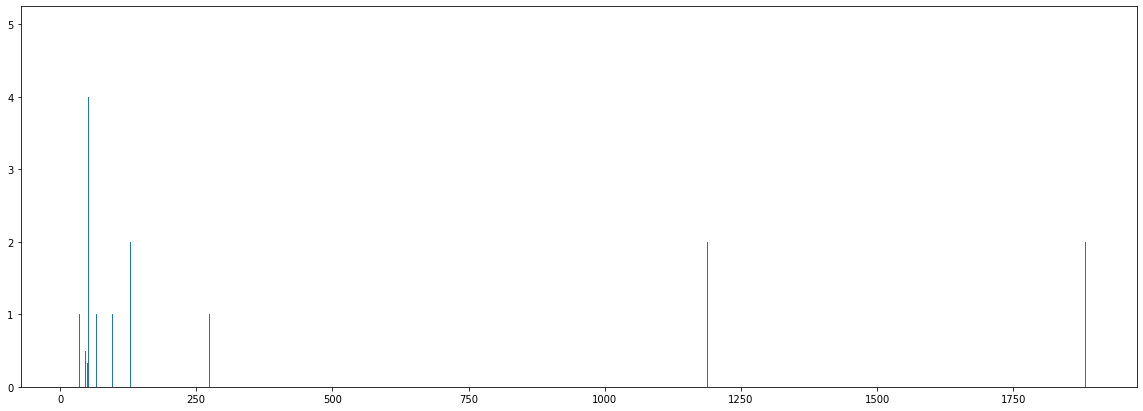

In [153]:
# save the automatic user evaluation
df_eval_users_auto.to_csv("../logs/df_eval_users_auto")

# visualize automatic eval
plt.rcParams["figure.figsize"] = (20,7)
plt.bar(df_eval_users_auto.index, df_eval_users_auto.overlap)
plt.show()

---

### Examples

a) recommendations for movie Rivals about F1 race drives:  
* solid recommendations almost all movies are about main characters competing / rivalry (in some form)
* bad recommendations:
    * 295103-domek-z-karet - does not fit at all
    * Rivalové (14623-rivalove) - is ranked as 1st because of the title match unless we weight down the TfidfTitleRS

In [41]:
# Example without genres turned on
rivals = '301401-rivalove'

sport_movies = [rivals]


w1 = [0.25, 0.1, 0.25, 0.5, 0] # Genres turned off
w2 = [0.25, 0.1, 0.25, 0.5, 0.5]

ensemble.recommend(sport_movies, n=15, rs_weights=w1, return_full_info=True)[['title', 'genres', 'final_score']]

Weighting the recommendations: [0.25, 0.1, 0.25, 0.5, 0]


,title,genres,final_score
0,Na plný plyn,"[Akční, Sportovní]",0.622852
1,Formule!,"[Akční, Drama, Sportovní]",0.612620
2,Senna,"[Dokumentární, Životopisný, Sportovní]",0.583259
3,Drive,"[Krimi, Thriller, Drama]",0.547149
4,Rivalové,"[Komedie, Sportovní]",0.510796
5,Magická hlubina,"[Drama, Romantický, Dobrodružný]",0.489919
6,Domek z karet,[Drama],0.485906
7,Extrémní svahy,"[Dokumentární, Sportovní]",0.485087
8,Fighter,"[Drama, Sportovní, Životopisný]",0.479026
9,Synové hor,"[Drama, Životopisný, Sportovní]",0.469722


**Now GenreRS is turned on.**  
We can observe that the number of movies with "Zivotopisny", "Sportovni", and "Drama" genres noticably increased while irrelevant genres are not that common.  
A couple of great recommendations appeared like:

* Orol Eddie
* Borg McEnroe
* Le Mans
* 42 (basketbal, wahlberg, zanre sedia)
* Zazracny bezec
* Ip Man & Ip Man 2

And at the same time the following movies are gone:
* 268133-megamysl 	
* 300902-bohemian-rhapsody
* 223160-dokonaly-trik
* 295103-domek-z-karet

In [36]:
rivals = '301401-rivalove'

sport_movies = [rivals]

ensemble.recommend(sport_movies, n=15, rs_weights=[0.25, 0.1, 0.25, 0.5, 0.5], return_full_info=True)

Weighting the recommendations: [0.25, 0.1, 0.25, 0.5, 0.5]


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,4159-formule,0.106022,0.006598,0.0,0.500000,0.375,0.987620,Formule!,Mladičký a mimořádně talentovaný závodník Jimm...,"[Akční, Drama, Sportovní]","[USA, Kanada, Austrálie]",2001,"[Sylvester Stallone, Kip Pardue, Til Schweiger...",2.037855,317,2.395832
1,138038-na-plny-plyn,0.147656,0.001316,0.0,0.473880,0.250,0.872852,Na plný plyn,"Rychlá závodní auta, rivalita, přátelství, lás...","[Akční, Sportovní]",[Francie],2003,"[Sagamore Stévenin, Peter Youngblood Hills, Je...",2.390625,64,3.069318
2,230220-fighter,0.191136,0.020986,0.0,0.266905,0.375,0.854026,Fighter,Hvězdně obsazené biografické drama v hlavních...,"[Drama, Sportovní, Životopisný]",[USA],2010,"[Mark Wahlberg, Christian Bale, Amy Adams, Dav...",3.802187,1006,3.772653
3,2471-synove-hor,0.178456,0.001253,0.0,0.290013,0.375,0.844722,Synové hor,Příběh o přátelství na život a na smrt zachycu...,"[Drama, Životopisný, Sportovní]",[Československo],1956,"[Josef Bek, Svatava Hubeňáková, Jiří Vala, Čen...",3.704918,61,3.567548
4,291617-senna,0.230968,0.013113,0.0,0.339178,0.250,0.833259,Senna,Film SENNA přináší skutečný příběh legendárníh...,"[Dokumentární, Životopisný, Sportovní]","[Velká Británie, Francie]",2010,"[Ayrton Senna, Rubens Barrichello, Gerhard Ber...",4.570747,629,4.416979
5,332773-le-mans-66,0.226675,0.013949,0.0,0.080671,0.500,0.821294,Le Mans '66,V roce 1959 je Carroll Shelby (Matt Damon) na ...,"[Drama, Životopisný, Sportovní, Akční]","[USA, Francie]",2019,"[Matt Damon, Christian Bale, Jon Bernthal, Jam...",4.481315,669,4.347536
6,269230-tacho,0.107914,0.008269,0.0,0.288635,0.375,0.779818,TACHO,TACHO je černá komedie Mirjam Landy o úspěšném...,"[Akční, Komedie, Drama, Sportovní]",[Česko],2010,"[Daniel Landa, Olga Lounová, Rudolf Hrušínský ...",2.148615,397,2.426438
7,205774-v-zajeti-rychlosti,0.214065,0.008520,0.0,0.168567,0.375,0.766152,V zajetí rychlosti,Natočeno podle pravdivého příběhu. Anthony Hop...,"[Dobrodružný, Drama, Sportovní, Životopisný]","[Nový Zéland, USA]",2005,"[Anthony Hopkins, Christopher Lawford, Aaron M...",4.310513,409,4.143558
8,311865-42,0.178842,0.006056,0.0,0.202027,0.375,0.761924,42,Na začátku baseballové sezóny 1946 se majitel ...,"[Drama, Životopisný, Sportovní]",[USA],2013,"[Chadwick Boseman, Harrison Ford, Nicole Behar...",3.604811,291,3.573786
9,246291-ip-man,0.218130,0.015828,0.0,0.023446,0.500,0.757404,Ip Man,"Čína, rok 1935. Kluby bojových umění v městě F...","[Akční, Drama, Sportovní, Životopisný]","[Hongkong, Čína]",2008,"[Donnie Yen, Simon Yam, Lynn Hung, Wilson Yip,...",4.308300,759,4.209323


---
Movie `2777-svedska-trojka` is not a good recommendation

In [37]:
lion_king = '6741-lvi-kral'
madagaskar = '117282-madagaskar'
over_the_hedge = '43170-za-plotem'

disney_movies = [lion_king, madagaskar, over_the_hedge]

ensemble.recommend(disney_movies, n=15, rs_weights=[1,0.1,1,1,0], return_full_info=True)

Weighting the recommendations: [1, 0.1, 1, 1, 0]


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,516317-lvi-kral,0.730019,0.008582,1.000000,0.883475,0.0,2.622076,Lví král,"Snímek od studia Disney, jenž režíroval Jon Fa...","[Animovaný, Dobrodružný, Drama, Rodinný, Muzikál]",[USA],2019,"[Donald Glover, Seth Rogen, Chiwetel Ejiofor, ...",3.669903,412,3.633034
1,224801-madagaskar-2-utek-do-afriky,0.634277,0.014679,0.543755,1.000000,0.0,2.192711,Madagaskar 2: Útěk do Afriky,"Lev Alex, zebra Marty, žirafí samec Melman a h...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],2008,"[Ben Stiller, Sacha Baron Cohen, David Schwimm...",3.210227,704,3.245848
2,252667-madagaskar-3,0.699627,0.016663,0.849742,0.388952,0.0,1.954985,Madagaskar 3,"Tučňáci odletěli do Monte Carla, aby zde vyděl...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],2012,"[Ben Stiller, Chris Rock, David Schwimmer, Eri...",3.513141,799,3.510128
3,11020-lvi-kral-2-simbuv-pribeh,0.691910,0.003111,0.641949,0.542270,0.0,1.879240,Lví král 2: Simbův příběh,LVÍ KRÁL 2: SIMBŮV PŘÍBĚH dějově završuje tril...,"[Animovaný, Dobrodružný, Rodinný, Muzikál]","[USA, Austrálie]",1998,"[Matthew Broderick, Neve Campbell, Moira Kelly...",3.473333,150,3.478919
4,254111-tucnaci-z-madagaskaru,0.677764,0.003237,0.591939,0.456105,0.0,1.729045,Tučňáci z Madagaskaru,"Pro většinu lidí jsou Skipper, Kowalski, Rico ...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],(2008–2015),"[John DiMaggio, Tom McGrath, Jeff Bennett, Bre...",3.378205,156,3.421713
5,72879-lvi-kral-3-hakuna-matata,0.661262,0.002610,0.579511,0.378853,0.0,1.622237,Lví král 3: Hakuna Matata,Úplně novým veselým příběhem nás tentokráte pr...,"[Animovaný, Komedie, Rodinný, Dobrodružný]",[USA],2004,"[Matthew Broderick, Julie Kavner, Jerry Stille...",3.246032,126,3.354980
6,10089-byl-jednou-jeden-kral,0.929442,0.012946,0.559291,0.101859,0.0,1.603539,Byl jednou jeden král...,Král Já I. (J. Werich) má tři dcery – Drahomír...,"[Pohádka, Komedie]",[Československo],1954,"[Jan Werich, Vlasta Burian, Terezie Brzková, B...",4.599034,621,4.439511
7,19643-neni-kral-jako-kral,0.799469,0.002986,0.487679,0.189765,0.0,1.479899,Není král jako král,"Kuzco je mladý a egoistický král, který si mys...","[Animovaný, Komedie, Dobrodružný, Rodinný]",[USA],2000,"[David Spade, John Goodman, Eartha Kitt, Mark ...",4.222222,144,3.913893
8,684369-kral,0.786157,0.006515,0.559291,0.113780,0.0,1.465743,Král,Neposlušný princ Hal nastoupí po otcově smrti ...,"[Drama, Historický, Romantický, Válečný, Život...","[Velká Británie, Maďarsko, Austrálie]",2019,"[Timothée Chalamet, Joel Edgerton, Robert Patt...",3.984026,313,3.860061
9,269587-kralova-rec,0.888697,0.039507,0.282834,0.197082,0.0,1.408120,Králova řeč,"Po smrti otce, anglického krále Jiřího V. (Mic...","[Drama, Životopisný]","[Velká Británie, USA, Austrálie]",2010,"[Colin Firth, Helena Bonham Carter, Derek Jaco...",4.318014,1893,4.274735


In [354]:
ensemble.recommend(disney_movies, n=15, rs_weights=[1,0.1,1,1,1], return_full_info=True)

Weighting the recommendations: [1, 0.1, 1, 1, 1]


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,516317-lvi-kral,0.730019,0.008582,1.000000,0.883475,0.916667,3.538743,Lví král,"Snímek od studia Disney, jenž režíroval Jon Fa...","[Animovaný, Dobrodružný, Drama, Rodinný, Muzikál]",[USA],2019,"[Donald Glover, Seth Rogen, Chiwetel Ejiofor, ...",3.669903,412,3.633034
1,224801-madagaskar-2-utek-do-afriky,0.634277,0.014679,0.543755,1.000000,0.916667,3.109378,Madagaskar 2: Útěk do Afriky,"Lev Alex, zebra Marty, žirafí samec Melman a h...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],2008,"[Ben Stiller, Sacha Baron Cohen, David Schwimm...",3.210227,704,3.245848
2,252667-madagaskar-3,0.699627,0.016663,0.849742,0.388952,0.916667,2.871651,Madagaskar 3,"Tučňáci odletěli do Monte Carla, aby zde vyděl...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],2012,"[Ben Stiller, Chris Rock, David Schwimmer, Eri...",3.513141,799,3.510128
3,11020-lvi-kral-2-simbuv-pribeh,0.691910,0.003111,0.641949,0.542270,0.833333,2.712574,Lví král 2: Simbův příběh,LVÍ KRÁL 2: SIMBŮV PŘÍBĚH dějově završuje tril...,"[Animovaný, Dobrodružný, Rodinný, Muzikál]","[USA, Austrálie]",1998,"[Matthew Broderick, Neve Campbell, Moira Kelly...",3.473333,150,3.478919
4,254111-tucnaci-z-madagaskaru,0.677764,0.003237,0.591939,0.456105,0.916667,2.645711,Tučňáci z Madagaskaru,"Pro většinu lidí jsou Skipper, Kowalski, Rico ...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],(2008–2015),"[John DiMaggio, Tom McGrath, Jeff Bennett, Bre...",3.378205,156,3.421713
5,72879-lvi-kral-3-hakuna-matata,0.661262,0.002610,0.579511,0.378853,0.916667,2.538904,Lví král 3: Hakuna Matata,Úplně novým veselým příběhem nás tentokráte pr...,"[Animovaný, Komedie, Rodinný, Dobrodružný]",[USA],2004,"[Matthew Broderick, Julie Kavner, Jerry Stille...",3.246032,126,3.354980
6,19643-neni-kral-jako-kral,0.799469,0.002986,0.487679,0.189765,0.916667,2.396565,Není král jako král,"Kuzco je mladý a egoistický král, který si mys...","[Animovaný, Komedie, Dobrodružný, Rodinný]",[USA],2000,"[David Spade, John Goodman, Eartha Kitt, Mark ...",4.222222,144,3.913893
7,342457-tucnaci-z-madagaskaru,0.670688,0.007350,0.591939,0.104020,0.916667,2.290663,Tučňáci z Madagaskaru,Objevte tajemství nejlepších a nejvtipnějších ...,"[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],2014,"[Benedict Cumberbatch, John Malkovich, Annet M...",3.365439,353,3.393097
8,15000-shrek-2,0.860841,0.013865,0.000000,0.175833,0.916667,1.967206,Shrek 2,Když zlobr Shrek zachránil princeznu Fionu a p...,"[Animovaný, Dobrodružný, Rodinný, Komedie]",[USA],2004,"[Mike Myers, Eddie Murphy, Cameron Diaz, Conra...",4.267669,665,4.162088
9,234768-jak-vycvicit-draka,0.923601,0.036500,0.000000,0.080417,0.916667,1.957185,Jak vycvičit draka,Viděli jste už trojrozměrného draka? A Vikinga...,"[Animovaný, Dobrodružný, Fantasy, Komedie, Rod...",[USA],2010,"[Jay Baruchel, Gerard Butler, Craig Ferguson, ...",4.471126,1749,4.415891


In [38]:
ryan = '8652-zachrante-vojina-ryana'
bros = '70341-bratrstvo-neohrozenych'

war_movies = [ryan, bros]

ensemble.recommend(war_movies, n=15, rs_weights=[0.6, 0.1, 0.6, 1, 0.7], return_full_info=True)

Weighting the recommendations: [0.6, 0.1, 0.6, 1, 0.7]


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,26953-von-ryanuv-expres,0.453298,0.001712,0.563747,0.497421,0.56,2.076178,Von Ryanův Expres,Když do zajateckého tábora v Pescaře v Itálii ...,"[Válečný, Drama, Dobrodružný]",[USA],1965,"[Frank Sinatra, Trevor Howard, Raffaella Carrà...",4.048193,83,3.736071
1,346-prilis-vzdaleny-most,0.488664,0.005450,0.000000,0.547545,0.70,1.741659,Příliš vzdálený most,Válečný snímek z období konce druhé světové vá...,"[Drama, Historický, Válečný]","[USA, Velká Británie]",1977,"[Dirk Bogarde, James Caan, Michael Caine, Rich...",4.167939,262,3.974441
2,10649-vysoka-hra-patriotu,0.406915,0.003905,0.000000,1.000000,0.28,1.690820,Vysoká hra patriotů,Bývalý analytik CIA a námořní důstojník Jack R...,"[Akční, Thriller, Drama, Krimi]",[USA],1992,"[Harrison Ford, Anne Archer, Patrick Bergin, P...",3.388298,188,3.423443
3,234976-zelena-zona,0.433918,0.017143,0.000000,0.654360,0.56,1.665422,Zelená zóna,V roce 2003 se v okolí paláce svrženého diktát...,"[Drama, Válečný, Akční, Thriller]","[USA, Velká Británie, Francie, Španělsko]",2010,"[Matt Damon, Greg Kinnear, Brendan Gleeson, Pa...",3.620438,822,3.605449
4,10157-v-prave-poledne,0.470749,0.005137,0.000000,0.861683,0.28,1.617568,V pravé poledne,Šerif Will Kane si právě vzal za manželku mlad...,"[Western, Drama]",[USA],1952,"[Gary Cooper, Thomas Mitchell, Lloyd Bridges, ...",4.008097,247,3.853690
5,307899-zachrante-pana-bankse,0.434287,0.006348,0.538547,0.046379,0.42,1.445561,Zachraňte pana Bankse,Walt Disney dlouhodobě usiluje o filmová práva...,"[Komedie, Drama, Životopisný, Historický, Rodi...","[USA, Velká Británie, Austrálie]",2013,"[Tom Hanks, Emma Thompson, Colin Farrell, John...",3.649180,305,3.607935
6,10227-nejhorsi-obavy,0.419037,0.006515,0.000000,0.440879,0.56,1.426431,Nejhorší obavy,V roce 1973 je při válce mezi Izraelem a Sýrií...,"[Akční, Drama, Thriller, Válečný]","[USA, Německo]",2002,"[Ben Affleck, Morgan Freeman, James Cromwell, ...",3.511182,313,3.505145
7,4004-most-u-remagenu,0.461560,0.002756,0.000000,0.380282,0.56,1.404598,Most u Remagenu,Je březen 1945 a válka v Evropě se už pomalu c...,"[Válečný, Akční, Drama]",[USA],1969,"[George Segal, Ben Gazzara, Robert Vaughn, Joh...",4.030075,133,3.791753
8,11541-nejdelsi-den,0.489717,0.003863,0.000000,0.208234,0.70,1.401814,Nejdelší den,6. červen 1944. Spojenecká invaze ve Francii p...,"[Válečný, Akční, Drama, Historický]",[USA],1962,"[Eddie Albert, Paul Anka, Arletty, Ken Annakin...",4.258065,186,3.981536
9,3297-statecne-srdce,0.569731,0.026018,0.000000,0.078773,0.70,1.374522,Statečné srdce,William Wallace je malý chlapec a žije se svým...,"[Drama, Historický, Válečný, Životopisný]",[USA],1995,"[Mel Gibson, Sophie Marceau, Patrick McGoohan,...",4.607057,1247,4.520833


The Silence of the lambs
* looks good overall

In [39]:
lambs = '2356-mlceni-jehnatek'

ensemble.recommend([lambs], n=15, rs_weights=[0.15, 0.1, 0.15, 1, 0.5], return_full_info=True)

Weighting the recommendations: [0.15, 0.1, 0.15, 1, 0.5]


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,8272-hannibal,0.098246,0.012675,0.0,1.000000,0.500,1.610921,Hannibal,Ošetřovatel z vězeňského ústavu pro duševně ch...,"[Krimi, Thriller, Drama, Horor]","[Velká Británie, USA]",2001,"[Anthony Hopkins, Julianne Moore, Giancarlo Gi...",3.302632,608,3.329558
1,323483-hannibal,0.116907,0.013573,0.0,0.709828,0.500,1.340307,Hannibal,Dr. Hannibal Lecter se po letech vrací na sezn...,"[Krimi, Thriller, Drama, Horor, Mysteriózní]",[USA],(2013–2015),"[Hugh Dancy, Mads Mikkelsen, Caroline Dhaverna...",3.887865,651,3.832643
2,222344-hannibal-zrozeni,0.078350,0.009250,0.0,0.317695,0.500,0.905296,Hannibal - Zrození,Druhá světová válka – pokusy o nezávislost výc...,"[Thriller, Drama, Horor, Krimi]","[Velká Británie, Česko, Francie, Itálie, USA]",2007,"[Gaspard Ulliel, Li Gong, Dominic West, Peter ...",2.630631,444,2.793148
3,6839-vrazdy-podle-jidase,0.095774,0.005325,0.0,0.220686,0.500,0.821785,Vraždy podle Jidáše,Hlavní postavou drsného a krvavého thrilleru j...,"[Krimi, Drama, Horor, Mysteriózní, Thriller]",[USA],1999,"[Christopher Lambert, Mike Anscombe, Robert Jo...",3.171875,256,3.262904
4,6450-cerveny-drak,0.098383,0.002485,0.0,0.335196,0.375,0.811063,Červený drak,Psychologický thriller podle novely Thomase Ha...,"[Krimi, Drama, Mysteriózní, Thriller]",[USA],1986,"[William Petersen, Kim Greist, Joan Allen, Mic...",3.200000,120,3.333238
5,7588-cerveny-drak,0.109737,0.011840,0.0,0.173023,0.500,0.794600,Červený drak,"Will Graham, agent FBI, je sice muž středního ...","[Krimi, Thriller, Drama, Horor]","[USA, Německo]",2002,"[Anthony Hopkins, Edward Norton, Ralph Fiennes...",3.667254,568,3.639353
6,6634-henry-portret-masoveho-vraha,0.100576,0.003696,0.0,0.148303,0.500,0.752575,Henry: Portrét masového vraha,Snímek volně inspirovaný skutečným příběhem sé...,"[Drama, Thriller, Horor, Krimi, Životopisný]",[USA],1986,"[Michael Rooker, Tom Towles, Tracy Arnold, Joh...",3.337079,178,3.392359
7,406882-labyrint,0.110127,0.006953,0.0,0.233900,0.375,0.725981,Labyrint,"Nález těla krajského politika Karase, kterého ...","[Krimi, Drama, Thriller, Mysteriózní]",[Česko],(2015–2018),"[Jiří Langmajer, Zuzana Kanócz, Stanislav Maje...",3.700599,334,3.649875
8,10775-d-tox,0.081166,0.005199,0.0,0.124032,0.500,0.710397,D-Tox,Agent FBI Jake Malloy se stane svědkem brutáln...,"[Thriller, Krimi, Drama, Horor, Mysteriózní]","[USA, Německo]",2002,"[Sylvester Stallone, Tom Berenger, Charles S. ...",2.612000,250,2.869055
9,21437-obcan-x,0.119569,0.005095,0.0,0.188307,0.375,0.687971,Občan X,Americký televizní snímek vznikl podle skuteč...,"[Krimi, Thriller, Drama, Životopisný, Historický]",[USA],1995,"[Stephen Rea, Donald Sutherland, Max von Sydow...",4.081633,245,3.904428


### Problem: 4 completely distinct movies, but top recomendations are dominated by one of them

In [80]:
ensemble.recommend([lambs, rivals, bros, madagaskar], n=15, rs_weights=[0.5, 0.1, 0, 1, 0], return_full_info=True)

Weighting the recommendations: [0.5, 0.1, 0, 1, 0]


,movie_id,score_TopBayesAvgRatingRS_bayes_avg_rating,score_MostRatingsRS_num_ratings,score_TfidfTitleRS,score_TfidfDescriptionTitleRS,score_GenresRS,final_score,title,description,genres,countries,year,creators,avg_stars,num_ratings,bayes_avg_rating
0,224801-madagaskar-2-utek-do-afriky,0.317138,0.014679,0.0,1.000000,0.0,1.331818,Madagaskar 2: Útěk do Afriky,"Lev Alex, zebra Marty, žirafí samec Melman a h...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],2008,"[Ben Stiller, Sacha Baron Cohen, David Schwimm...",3.210227,704,3.245848
1,2777-svedska-trojka,0.361090,0.001650,0.0,0.416252,0.0,0.778992,Švédská trojka,"Mladá Alex přichází na kolej, kde má strávit p...","[Komedie, Romantický, Drama]",[USA],1994,"[Lara Flynn Boyle, Stephen Baldwin, Josh Charl...",3.750000,80,3.601333
2,254111-tucnaci-z-madagaskaru,0.338882,0.003237,0.0,0.433107,0.0,0.775226,Tučňáci z Madagaskaru,"Pro většinu lidí jsou Skipper, Kowalski, Rico ...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],(2008–2015),"[John DiMaggio, Tom McGrath, Jeff Bennett, Bre...",3.378205,156,3.421713
3,8961-jen-blazni-spechaji,0.319435,0.002360,0.0,0.446125,0.0,0.767920,Jen blázni spěchají,"Alex Whitman, ambiciózní manažer firmy zřizují...","[Komedie, Drama, Romantický]",[USA],1997,"[Matthew Perry, Salma Hayek, Jon Tenney, Andy ...",3.061404,114,3.264428
4,252667-madagaskar-3,0.349813,0.016663,0.0,0.389524,0.0,0.756000,Madagaskar 3,"Tučňáci odletěli do Monte Carla, aby zde vyděl...","[Animovaný, Dobrodružný, Komedie, Rodinný]",[USA],2012,"[Ben Stiller, Chris Rock, David Schwimmer, Eri...",3.513141,799,3.510128
5,257071-zmizeni,0.433070,0.034746,0.0,0.245086,0.0,0.712903,Zmizení,"Keller Dover se se svou ženou Grace, synem Ral...","[Thriller, Mysteriózní, Krimi, Drama, Psycholo...",[USA],2013,"[Hugh Jackman, Jake Gyllenhaal, Viola Davis, D...",4.227027,1665,4.183519
6,222337-hudbu-slozil-slova-napsal,0.328813,0.011777,0.0,0.334837,0.0,0.675427,"Hudbu složil, slova napsal",V 80. letech byl Alex Fletcher členem slavné h...,"[Romantický, Komedie, Hudební]",[USA],2007,"[Hugh Grant, Drew Barrymore, Brad Garrett, Mar...",3.313274,565,3.340277
7,8272-hannibal,0.327488,0.012675,0.0,0.328444,0.0,0.668607,Hannibal,Ošetřovatel z vězeňského ústavu pro duševně ch...,"[Krimi, Thriller, Drama, Horor]","[Velká Británie, USA]",2001,"[Anthony Hopkins, Julianne Moore, Giancarlo Gi...",3.302632,608,3.329558
8,272416-deti-moje,0.330400,0.011861,0.0,0.323299,0.0,0.665560,Děti moje,"Havajský právník Matt King se právě dozvěděl, ...","[Komedie, Drama]",[USA],2011,"[George Clooney, Mary Birdsong, Shailene Woodl...",3.328647,569,3.353113
9,323483-hannibal,0.389689,0.013573,0.0,0.257220,0.0,0.660481,Hannibal,Dr. Hannibal Lecter se po letech vrací na sezn...,"[Krimi, Thriller, Drama, Horor, Mysteriózní]",[USA],(2013–2015),"[Hugh Dancy, Mads Mikkelsen, Caroline Dhaverna...",3.887865,651,3.832643
